In [1]:
pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("TrainingWiDS2021.csv")

### Exploratory Data Analysis

In [4]:
df.shape

(130157, 181)

In [39]:
#df.head()

In [38]:
#df.describe().T

In [7]:
# drop columns that are not necessary
# readmission_status is 0 for all records 
df.drop(['Unnamed: 0','readmission_status','encounter_id','hospital_id', 'icu_id'], axis=1,inplace=True)

In [8]:
## Separate Categorical, numercial variables
#features = [c for c in df.columns if c not in [ID_COL, ID_COL1,ID_COL2, TARGET_COL]]

#cat_cols =  ['ethnicity',
#            'gender',
#            'hospital_admit_source',
#            'icu_admit_source',
#            'icu_stay_type',
#            'icu_type']

#num_cols = [c for c in features if c not in cat_cols]

In [9]:
df.shape

(130157, 176)

## Handle Missing values

In [10]:
# check for null values
df.isnull().sum().sum()

8018193

In [11]:
null_percentage=(df.isnull().sum().sum()/df.size)*100
null_percentage

35.00227784347156

In [40]:
# Calculate the % of null values for each column
null_values = pd.DataFrame((df.isna().mean().round(4) * 100),columns=['percentage'])
null_values.sort_values('percentage',ascending=False)

,percentage
h1_temp_max,21.65
h1_temp_min,21.65
wbc_apache,17.99
hematocrit_apache,15.87
bun_apache,14.65
creatinine_apache,14.24
sodium_apache,13.94
d1_hco3_min,10.35
d1_hco3_max,10.35
h1_mbp_noninvasive_min,9.52


In [41]:
# Drop columns with over 75% of null values
col_threshold = df.shape[0] * .75
df = df.dropna(axis=1,thresh=threshold)

In [45]:
df.shape

(117655, 101)

In [46]:
# Drop rows with over 75% null values
row_threshhold = df.shape[1] * .75
df = df.dropna(axis=0,thresh=row_threshhold)

In [47]:
df.shape

(117655, 101)

### 87,377 null values are still in the dataset

In [20]:
null_values = pd.DataFrame((df.isna().mean().round(4)*100),columns=['percentage'])

In [21]:
null_values.sort_values('percentage',ascending=False)

,percentage
h1_temp_max,21.74
h1_temp_min,21.74
wbc_apache,18.01
hematocrit_apache,15.86
bun_apache,14.66
creatinine_apache,14.26
sodium_apache,13.97
d1_hco3_min,10.38
d1_hco3_max,10.38
h1_mbp_noninvasive_min,9.42


In [48]:
# Drop rows with missing age
df.dropna(subset=['age'],inplace=True)

In [49]:
df.isnull().sum().sum()

468191

In [24]:
#df.columns.values.tolist()

In [25]:
#df.dtypes

### Analyze missing data for patterns

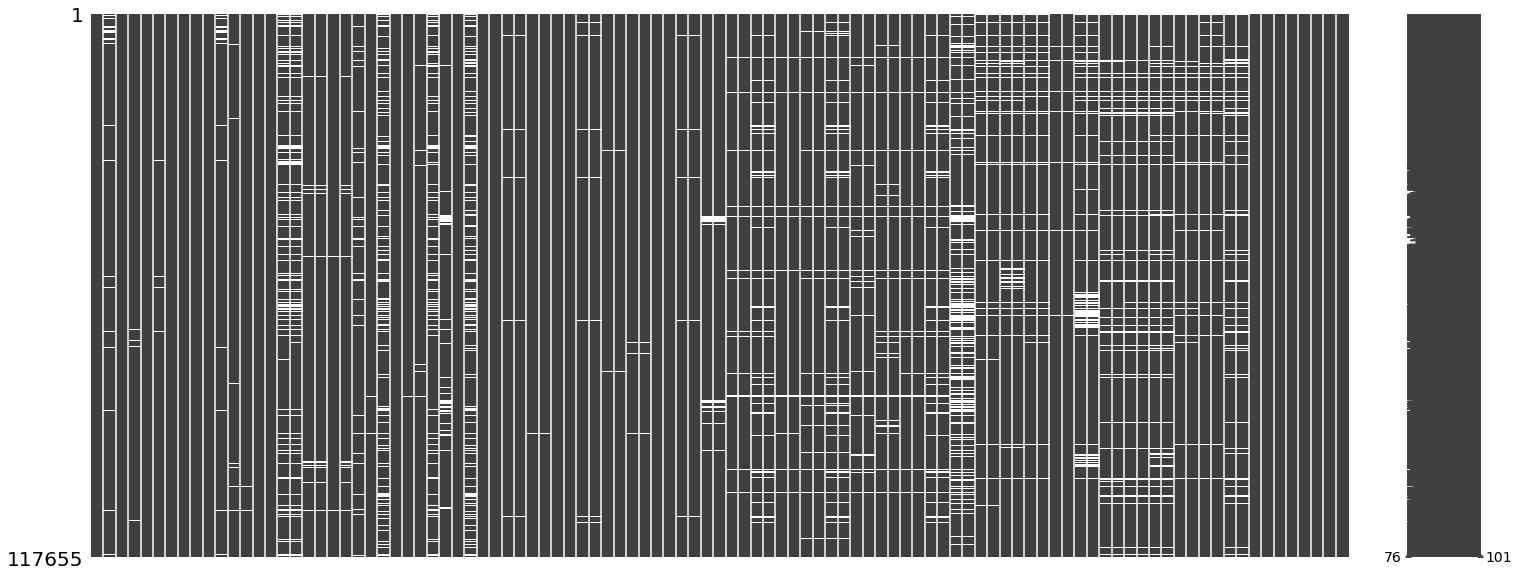

In [50]:
msno.matrix(df)

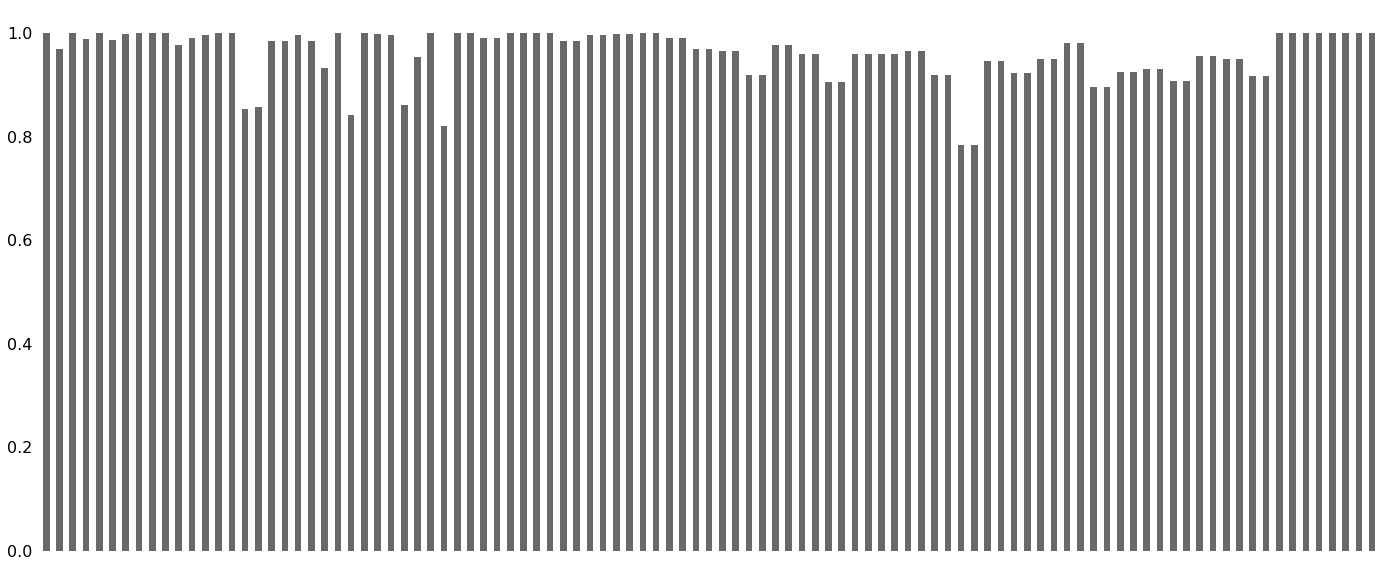

In [27]:
msno.bar(df) 

## Check the distribution of target variable

In [30]:
# Check distribution of the target variable. 
df['diabetes_mellitus'].value_counts(normalize=True)

0    0.774136
1    0.225864
Name: diabetes_mellitus, dtype: float64

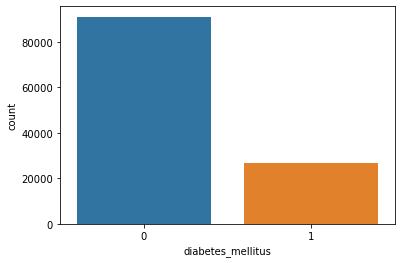

In [31]:
sns.countplot(x='diabetes_mellitus',data=df)

The dataset is highly imbalanced with 77.4% negative observation and only 22.5% positive observation.

### Analyze other attributes

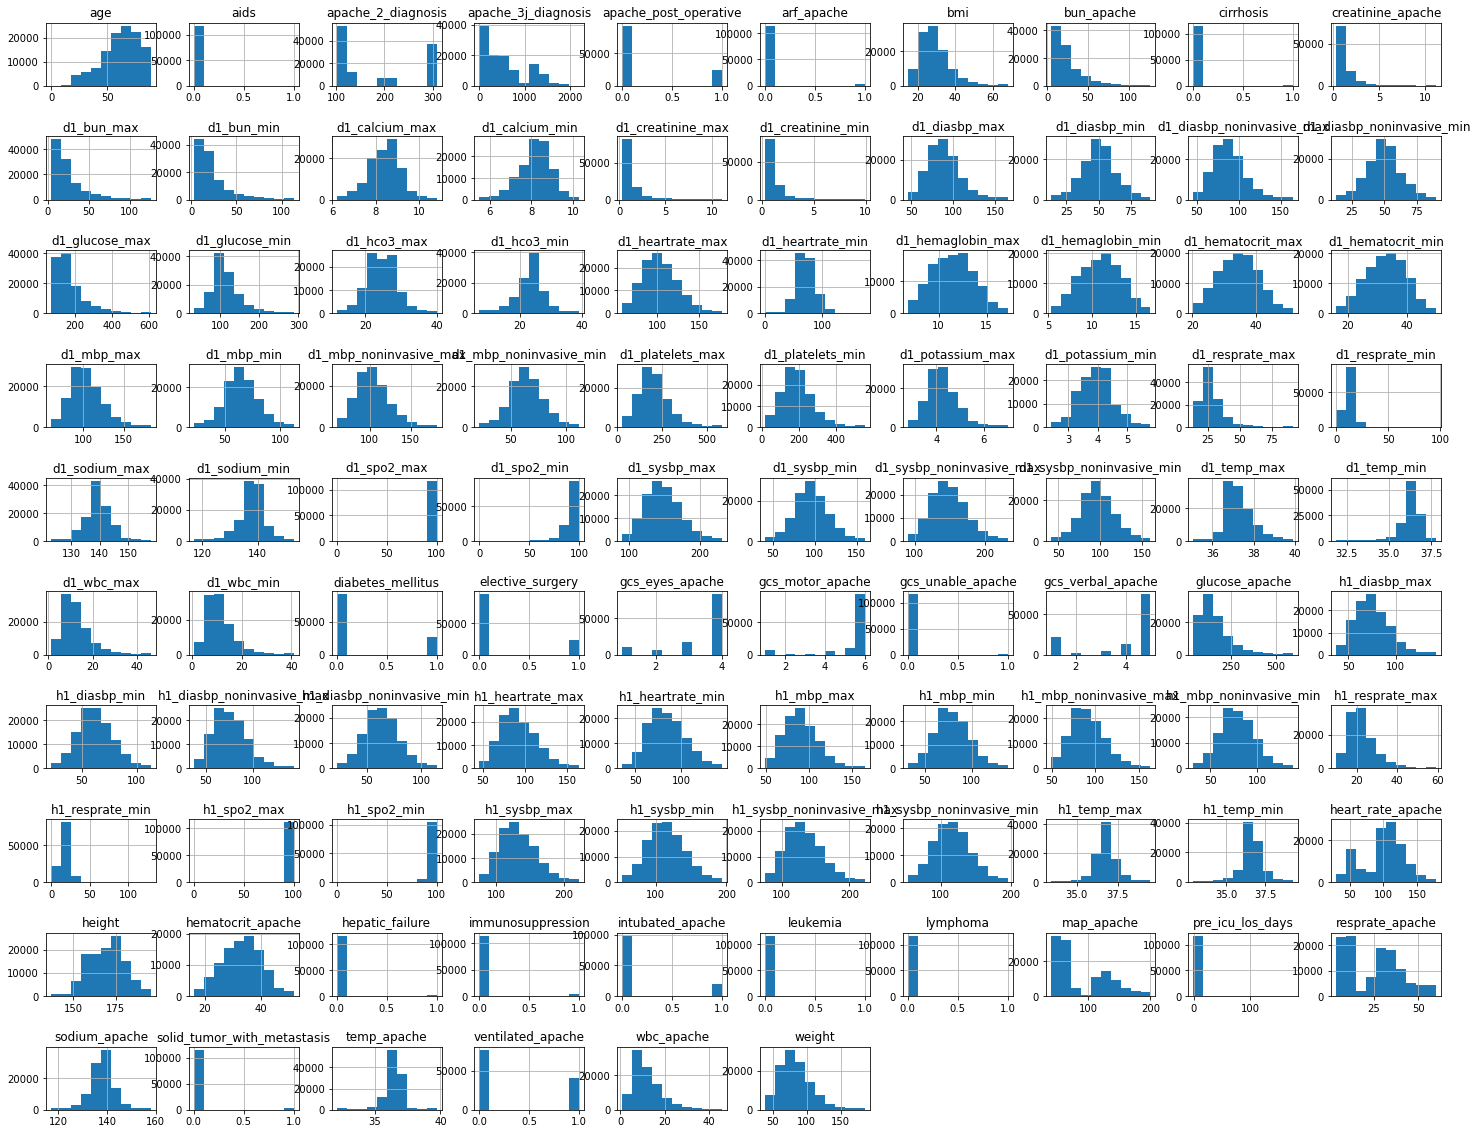

In [32]:
# Distrubtion of other attributes
df.hist(figsize=(25,20))
plt.subplots_adjust(hspace=0.8)
plt.show()

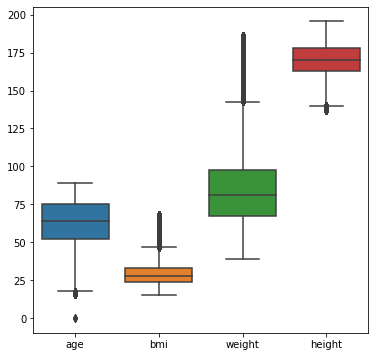

In [33]:
# Let's look at age, bmi, weight and height
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['age','bmi','weight','height']])
plt.show()

In [64]:
#df.columns.values.tolist()

# Univariate Analysis

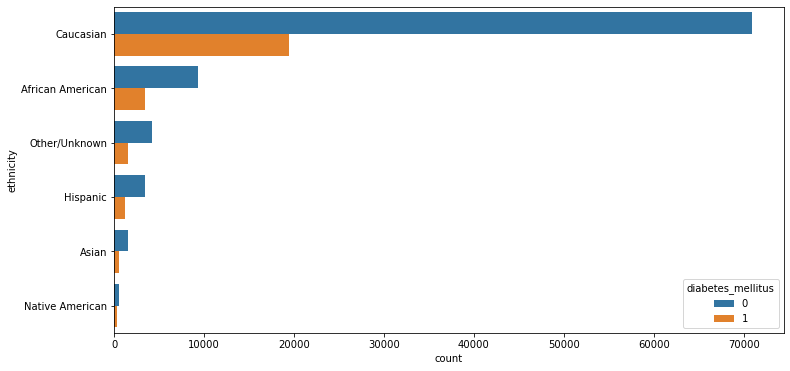

In [68]:
# Lets look at ethnicity
target = 'ethnicity'
descending_order = df[target].value_counts(normalize=True).sort_values(ascending=False).index

plt.figure(figsize=(12,6))
sns.countplot(data=df,y=target,order=descending_order,hue='diabetes_mellitus')

In [36]:
df['ethnicity'].value_counts(normalize=True)

Caucasian           0.775782
African American    0.110201
Other/Unknown       0.049752
Hispanic            0.039569
Asian               0.017211
Native American     0.007484
Name: ethnicity, dtype: float64

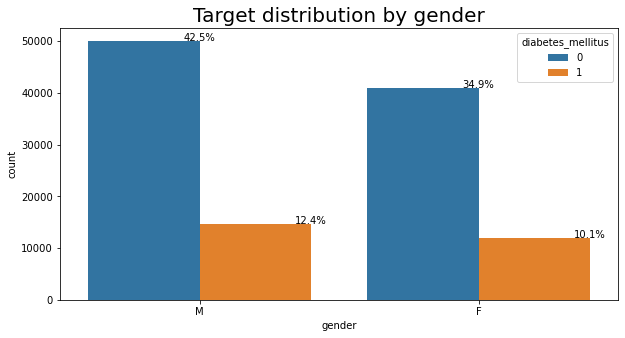

In [76]:
# Let's look at gender
plt.figure(figsize=(10,5))
total = float(len(df))
ax = sns.countplot(x="gender", hue="diabetes_mellitus", data=df)
plt.title('Target distribution by gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

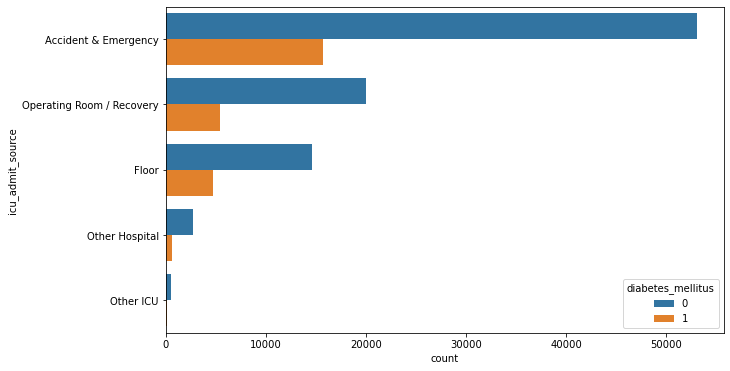

In [74]:
# Let's look at icu_admit_source
target = 'icu_admit_source'
descending_order = df['icu_admit_source'].value_counts(normalize=True).sort_values(ascending=False).index

plt.figure(figsize=(10,6))
sns.countplot(data=df,y=target,order=descending_order,hue='diabetes_mellitus')

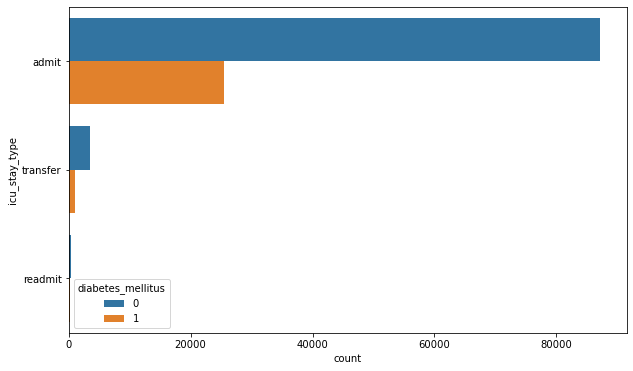

In [79]:
# Let's look at icu_stay_type
target = 'icu_stay_type'
descending_order = df['icu_stay_type'].value_counts(normalize=True).sort_values(ascending=False).index
plt.figure(figsize=(10,6))
sns.countplot(data=df,y=target,order=descending_order,hue='diabetes_mellitus')

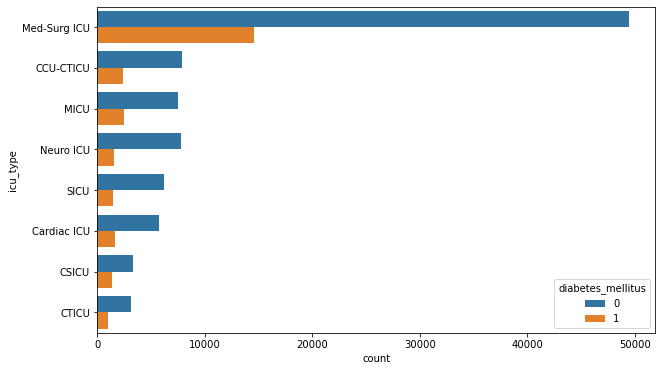

In [80]:
# Let's look at icu_type
target = 'icu_type'
descending_order = df['icu_type'].value_counts(normalize=True).sort_values(ascending=False).index
plt.figure(figsize=(10,6))
sns.countplot(data=df,y=target,order=descending_order,hue='diabetes_mellitus')

# Let's look at the Correlation between numeric variables and the target

In [82]:
# Correlation between numeric variables and Diabetes Mellitus
# convert and sort 
for n in num_cols:
    column_1 = df[n]
    column_2 = df["diabetes_mellitus"]
    correlation = column_1. corr(column_2)
    print(n + " :",correlation)

age : 0.07726126136280596
bmi : 0.16767308986030172
elective_surgery : -0.007554111934714795
height : -0.009316944782438918
pre_icu_los_days : 0.020718413133994765
weight : 0.1529814638044675
apache_2_diagnosis : 0.0033460769972132433
apache_3j_diagnosis : -0.01172257060690416
apache_post_operative : -0.015061638364431331
arf_apache : 0.10973556354358585
bun_apache : 0.1517307429458797
creatinine_apache : 0.12618209907233696
gcs_eyes_apache : 0.02943855767280367
gcs_motor_apache : 0.028269220390793905
gcs_unable_apache : -0.014374287229467571
gcs_verbal_apache : 0.0257878845716034
glucose_apache : 0.35543194395895333
heart_rate_apache : -0.022255400181577987
hematocrit_apache : -0.0551532547458927
intubated_apache : -0.00795278998826811
map_apache : 0.0016546128468345692
resprate_apache : -0.00757207478471187
sodium_apache : -0.041770015986967
temp_apache : -0.00576800752472729
ventilated_apache : 0.0027009864965081036
wbc_apache : 0.0062653865503009346
d1_diasbp_max : -0.0177575429927

# Convert Categorical variables

In [83]:
# Check null values for ethnicity
df['ethnicity'].isnull().sum()

1277

In [84]:
# Drop rows with missing ethnicity
df.dropna(subset=['ethnicity'],inplace=True)

In [85]:
# replace the Ethinicity with numeric values
df['ethnicity'].replace({'Caucasian': 0,
                         'African American': 1,
                         'Other/Unknown':2,
                         'Hispanic':3,'Asian':4,
                         'Native American':'5'}, inplace=True)
df['ethnicity'].value_counts(normalize=True)

0    0.775782
1    0.110201
2    0.049752
3    0.039569
4    0.017211
5    0.007484
Name: ethnicity, dtype: float64

In [86]:
df['ethnicity'] = df['ethnicity'].astype('int')

In [87]:
# Correlation between ethinicity and Diabetes Mellitus
column_1 = df["ethnicity"]
column_2 = df["diabetes_mellitus"]
correlation = column_1. corr(column_2)
print(correlation)

0.04409868555136295


In [94]:
# replace gender with numeric values
df['gender'].replace({'M': 0, 'F': 1}, inplace=True)
df['gender'].value_counts(normalize=True)

0    0.54949
1    0.45051
Name: gender, dtype: float64

In [95]:
df['gender'].isnull().sum()

0

In [96]:
# Drop rows with missing age
df.dropna(subset=['gender'],inplace=True)

In [97]:
df['gender'] = df['gender'].astype('int')

In [98]:
# Correlation between gender and Diabetes Mellitus
column_1 = df["gender"]
column_2 = df["diabetes_mellitus"]
correlation = column_1. corr(column_2)
print(correlation)

-0.001421795319334025
